# HIVE
HIVE is a project which is focused on recommending fertilizers to users based on plant disease images. This notebook comes under the ML part feature where the rest will be present in the Flask site

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from kaggle_datasets import KaggleDatasets
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Download dataset

Install gdown library using pip

In [7]:
!pip install gdown

  Using cached gdown-4.5.3-py3-none-any.whl (14 kB)


### Download dataset from Google Drive

In [8]:
!gdown --id 1fxs7ptI6zh7NTbCOZARKZ7AmYKjnprrY

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1fxs7ptI6zh7NTbCOZARKZ7AmYKjnprrY 



### Image preprocessing

First let's see details present in an image from dataset

In [9]:
image = cv2.imread("../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
image

array([[[196, 163, 167],
        [195, 162, 166],
        [194, 161, 165],
        ...,
        [211, 182, 185],
        [209, 180, 183],
        [207, 178, 181]],

       [[199, 166, 170],
        [198, 165, 169],
        [197, 164, 168],
        ...,
        [212, 183, 186],
        [210, 181, 184],
        [209, 180, 183]],

       [[199, 166, 170],
        [198, 165, 169],
        [197, 164, 168],
        ...,
        [214, 185, 188],
        [212, 183, 186],
        [211, 182, 185]],

       ...,

       [[124,  90, 100],
        [126,  92, 102],
        [128,  94, 104],
        ...,
        [137, 110, 126],
        [137, 110, 126],
        [137, 110, 126]],

       [[125,  91, 101],
        [126,  92, 102],
        [127,  93, 103],
        ...,
        [133, 106, 122],
        [134, 107, 123],
        [134, 107, 123]],

       [[128,  94, 104],
        [127,  93, 103],
        [126,  92, 102],
        ...,
        [132, 105, 121],
        [133, 106, 122],
        [134, 107, 123]]

We'll use ImageDataGenerator from keras library for Image Preprocessing

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size =(256, 256),  
                  batch_size = 32,
                  class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size =(256, 256),
                    batch_size = 32,
                    class_mode="categorical",
                    shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


From the above info, it's clear that there are 38 different categories in the dataset (crop varieties - both healthy and diseased)

# Model in TF.Keras

Now let's create a CNN model for classifying the image data

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
def cnn1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense((38), activation='softmax'))
    model.compile(optimizer='adam', metrics='Accuracy', loss='categorical_crossentropy')
    return model

In [13]:
model_1=cnn1()
model_1.summary()

2022-11-25 08:32:27.528008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 08:32:27.528937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 08:32:27.916155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 08:32:27.917069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 08:32:27.917846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

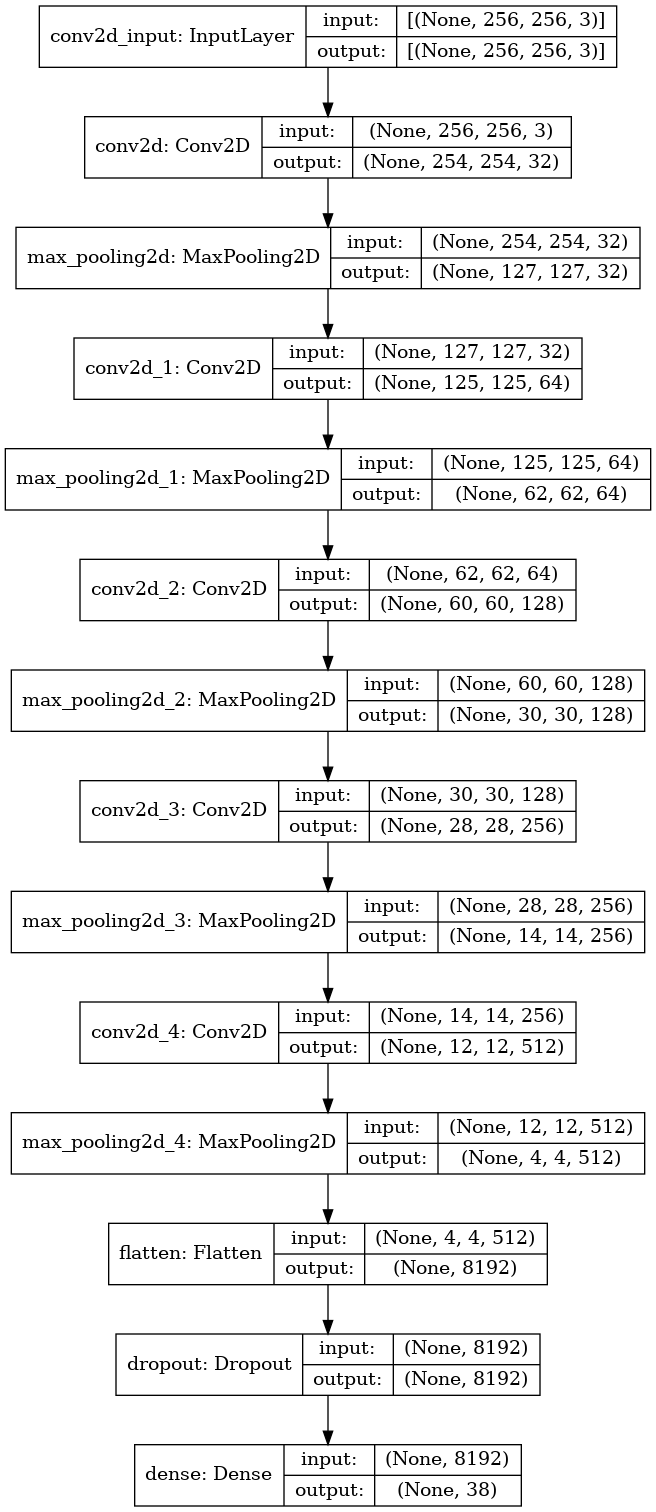

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='model.png', show_shapes=True, show_layer_names=True)

In [15]:
m1_res = model_1.fit(train_generator,
             epochs = 5,
             validation_data = test_generator)

2022-11-25 08:32:35.946703: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-11-25 08:32:38.635102: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2197/2197 [==============================] - 862s 386ms/step - loss: 1.2766 - Accuracy: 0.6255 - val_loss: 0.4443 - val_Accuracy: 0.8616
Epoch 2/5
2197/2197 [==============================] - 345s 157ms/step - loss: 0.3727 - Accuracy: 0.8797 - val_loss: 0.1940 - val_Accuracy: 0.9344
Epoch 3/5
2197/2197 [==============================] - 346s 157ms/step - loss: 0.2395 - Accuracy: 0.9216 - val_loss: 0.1853 - val_Accuracy: 0.9373
Epoch 4/5
2197/2197 [==============================] - 337s 153ms/step - loss: 0.1772 - Accuracy: 0.9406 - val_loss: 0.1314 - val_Accuracy: 0.9560
Epoch 5/5
2197/2197 [==============================] - 349s 159ms/step - loss: 0.1497 - Accuracy: 0.9502 - val_loss: 0.1064 - val_Accuracy: 0.9648


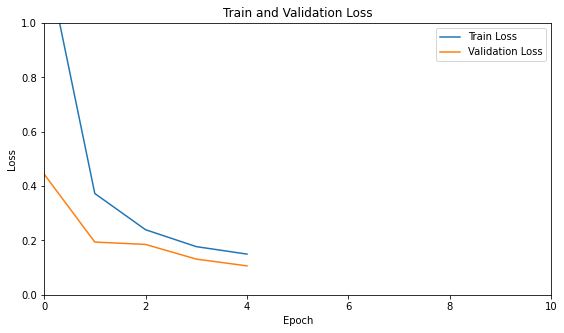

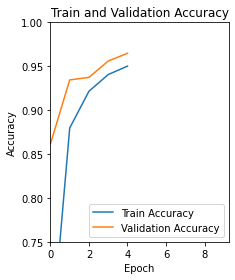

In [16]:
# Viewing metrics
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(m1_res.history['loss'],label="Train Loss")
plt.plot(m1_res.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(m1_res.history['Accuracy'], label="Train Accuracy")
plt.plot(m1_res.history['val_Accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()
plt.show()

[[494   0   0 ...   1   0   0]
 [  4 489   0 ...   0   0   0]
 [  2   1 422 ...   0   2   0]
 ...
 [  0   0   0 ... 484   0   0]
 [  0   0   0 ...   0 447   1]
 [  2   0   0 ...   0   0 476]]


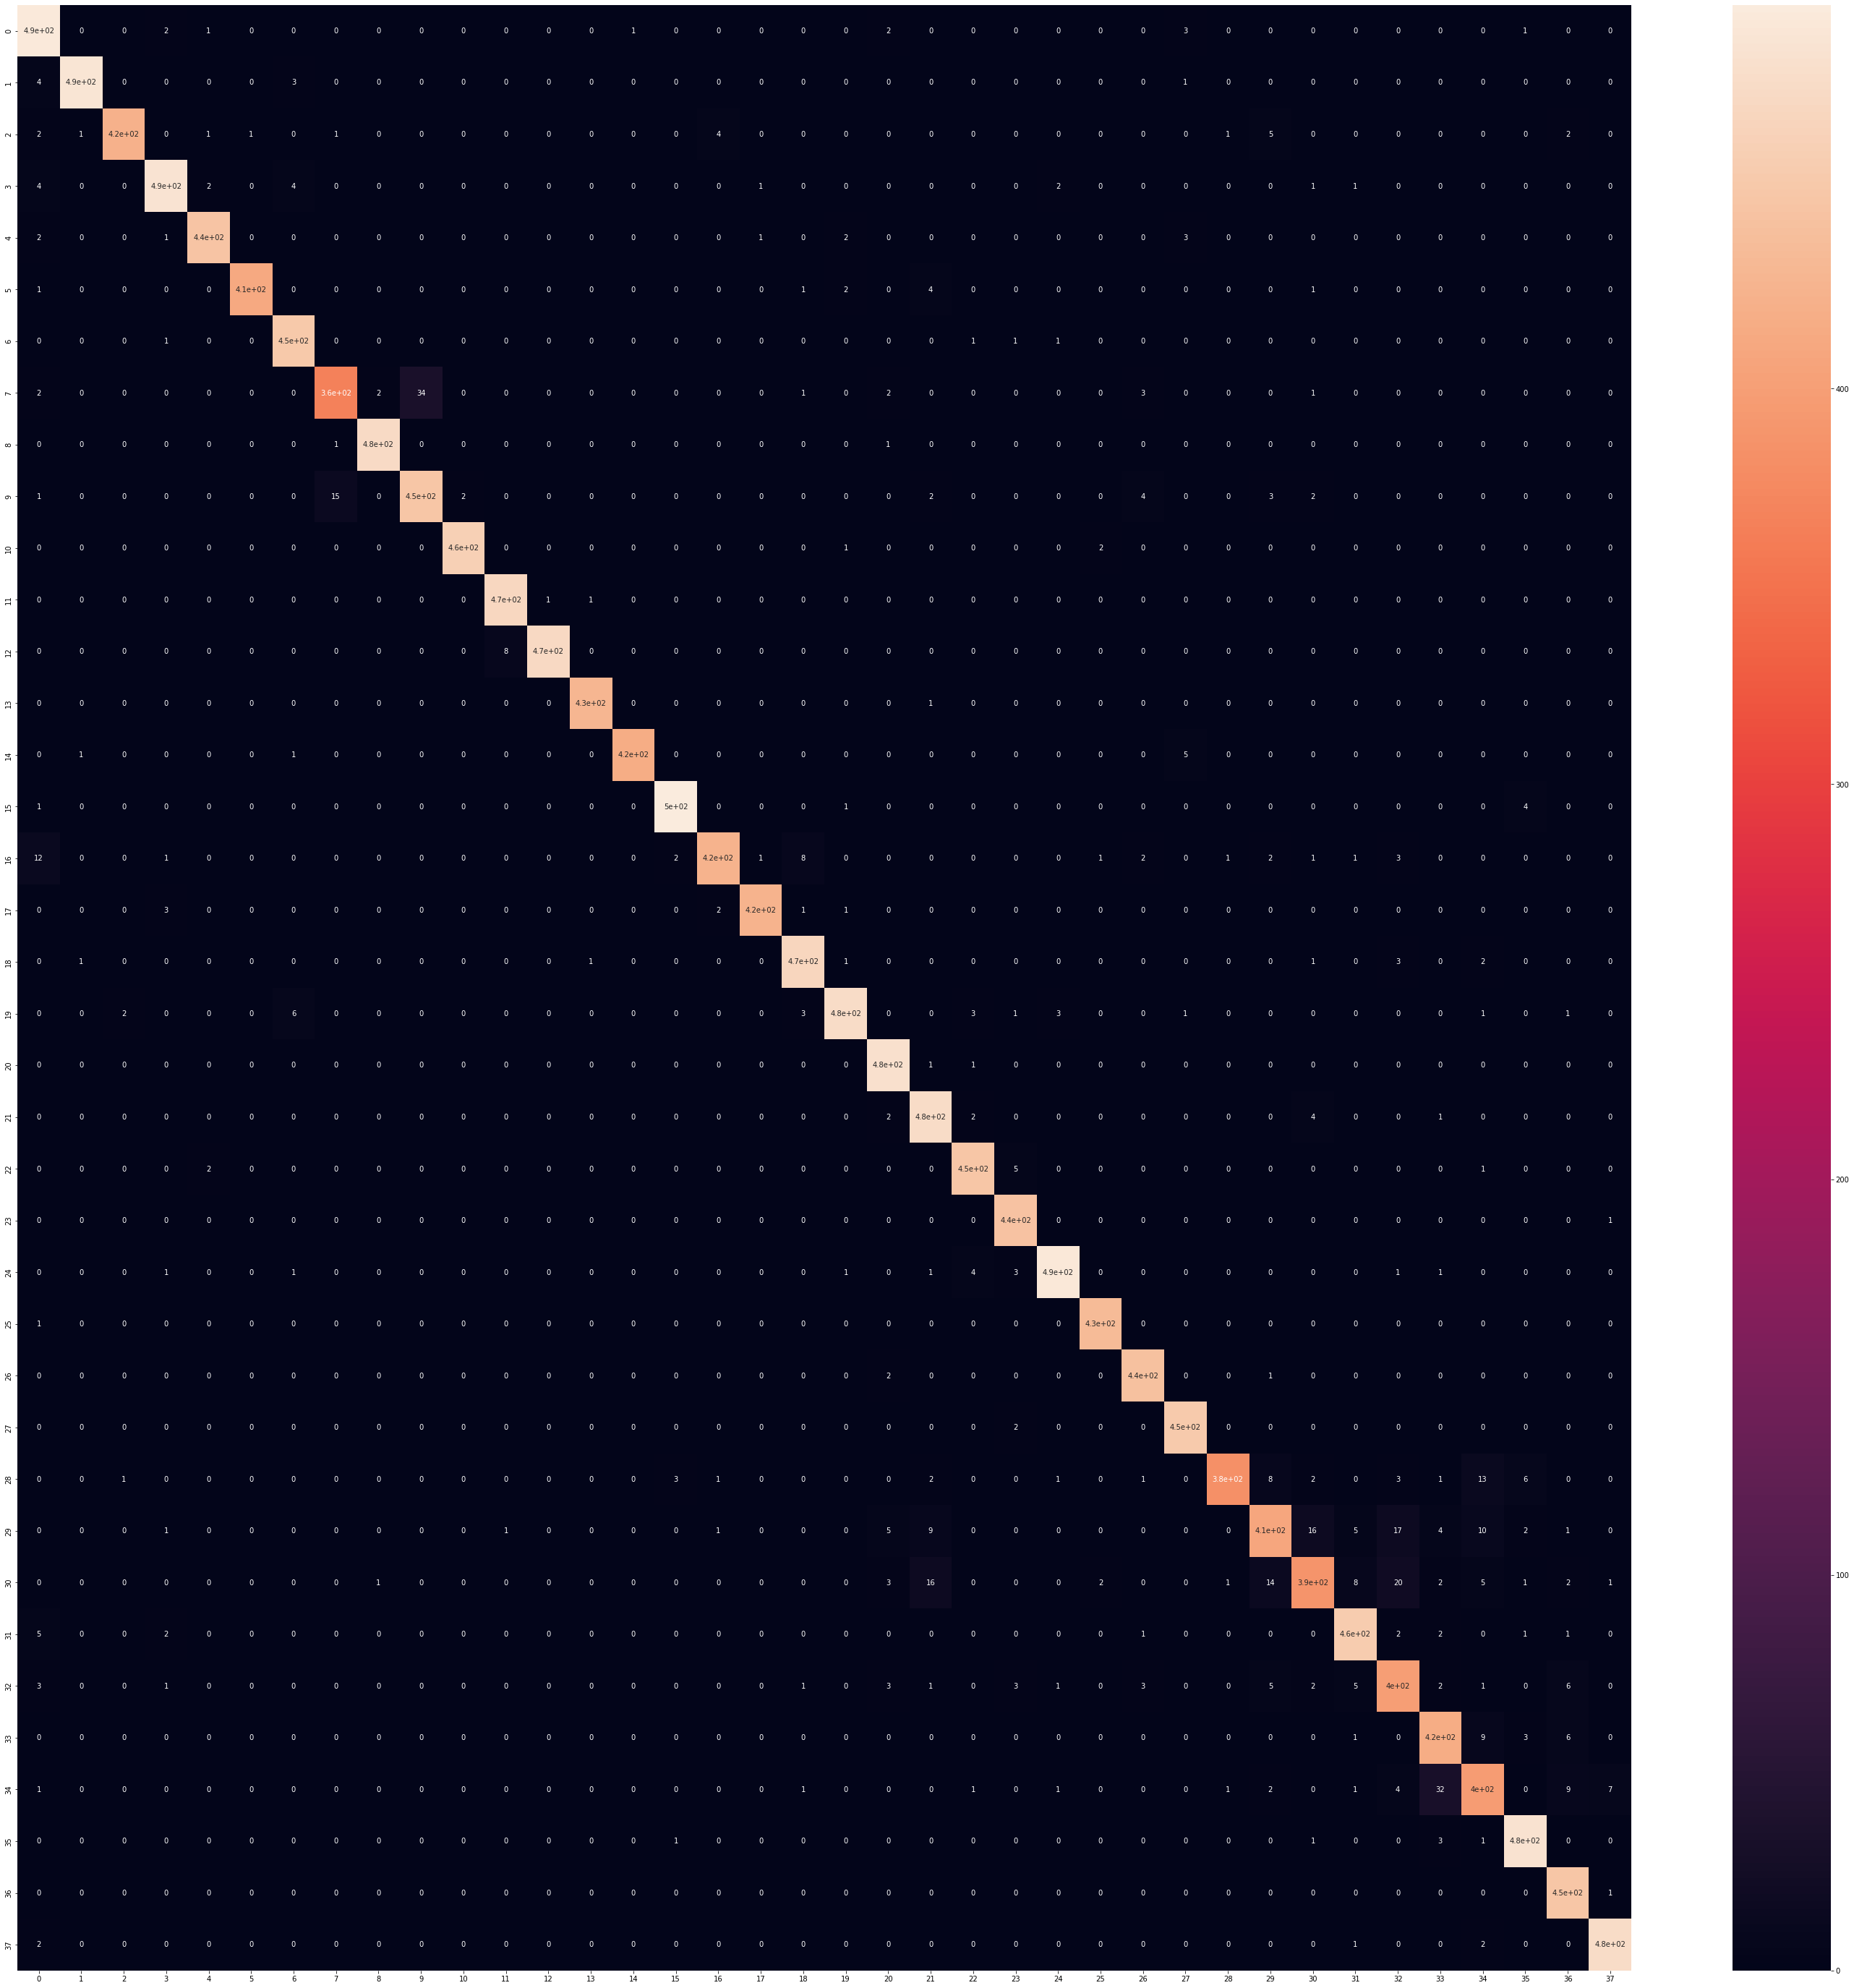

In [20]:
pred_data = model_1.predict(test_generator)

y_pred_binary = np.argmax(pred_data, axis = 1)
plt.figure(figsize=(50,50))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
cm = confusion_matrix(test_generator.classes,y_pred_binary)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [21]:
cm = classification_report(test_generator.classes,y_pred_binary)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       504
           1       0.99      0.98      0.99       497
           2       0.99      0.96      0.98       440
           3       0.97      0.97      0.97       502
           4       0.99      0.98      0.98       454
           5       1.00      0.98      0.99       421
           6       0.97      0.99      0.98       456
           7       0.96      0.89      0.92       410
           8       0.99      1.00      0.99       477
           9       0.93      0.94      0.93       477
          10       1.00      0.99      0.99       465
          11       0.98      1.00      0.99       472
          12       1.00      0.98      0.99       480
          13       1.00      1.00      1.00       430
          14       1.00      0.98      0.99       423
          15       0.99      0.99      0.99       503
          16       0.98      0.92      0.95       459
          17       0.99    

# Save and reload model

In [22]:
m1_saved = model_1.save("./m1_saved")
m1_h5 = model_1.save("./m1_hdf5.h5")

2022-11-25 09:17:48.832801: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [23]:
m1_recontr = tf.keras.models.load_model("./m1_hdf5.h5")

In [24]:
m1_recontr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [25]:
categories = list(train_generator.class_indices.keys())
print(train_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [26]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_generator.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/kaggle/working/class_indices.json

[[2.15361447e-14 1.76972989e-16 4.69011189e-14 2.18276275e-20
  1.32212659e-19 6.79728121e-23 1.01506808e-26 1.49748146e-17
  1.00000000e+00 1.20904200e-20 1.30518932e-26 2.76873895e-20
  1.53902764e-18 3.96351783e-16 3.84355990e-27 8.68150674e-20
  4.05304739e-12 4.54402207e-16 2.44550094e-13 1.36045033e-22
  2.83742451e-14 1.86331780e-18 8.11734636e-27 1.55892242e-33
  2.79932615e-34 2.28667796e-20 2.61645936e-16 1.29528341e-27
  7.32938581e-19 1.32652708e-11 1.76690032e-12 1.79661613e-19
  2.84728214e-13 3.45156875e-26 4.75939659e-20 5.07204331e-25
  1.09849274e-26 2.65901469e-21]]


8

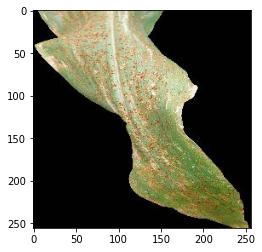

In [27]:
im1 = "../input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG"
dat = tf.keras.utils.load_img(im1)
plt.imshow(dat)
test_dat = tf.keras.preprocessing.image.img_to_array(dat)
test_dat = test_dat/255.0
test_dl = np.expand_dims(test_dat, axis=0)
pred = m1_recontr.predict(test_dl)

print(pred)
y_class = np.argmax(pred,axis=1)

y_class[0]

In [28]:
yt = train_generator.class_indices
yt

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [29]:
classes=['Apple_scab', 'Apple_Black_rot', 'Cedar_apple_rust', 
         'Apple_healthy', 'Blueberry_healthy', 
         'Cherry_Powdery_mildew', 'Cherry_healthy', 
         'Corn_Cercospora_leaf_spot', 'Corn_Common_rust_', 
         'Corn_Northern_Leaf_Blight', 'Corn_healthy', 
         'Grape_Black_rot', 'Grape_Black_Measles', 
         'Grape_Leaf_blight', 'Grape_healthy', 
         'Orange_Haunglongbing', 'Peach_Bacterial_spot', 
         'Peach_healthy', 'Pepper,_bell_Bacterial_spot', 'Pepper,_bell_healthy', 
         'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy', 
         'Raspberry_healthy', 'Soybean_healthy', 'Squash_Powdery_mildew', 
         'Strawberry_Leaf_scorch', 'Strawberry_healthy', 'Tomato_Bacterial_spot', 
         'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 
         'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 
         'Tomato_Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 
         'Tomato_Tomato_mosaic_virus', 'Tomato_healthy']

In [30]:
print(classes[y_class[0]])

Corn_Common_rust_


[[1.33420419e-09 5.45766463e-16 1.91452019e-12 1.97462839e-18
  2.86936547e-18 1.85315982e-18 2.73435977e-23 4.76790447e-11
  1.00000000e+00 1.60323516e-14 1.89912268e-22 2.28043329e-19
  1.93804323e-14 1.31488965e-14 7.34021957e-25 3.17658262e-18
  2.43654046e-15 6.45215671e-22 6.96528176e-13 6.51530465e-21
  1.88015450e-10 4.62429946e-14 9.29986379e-22 3.47259190e-27
  3.70512979e-24 7.07713049e-20 4.06314045e-12 1.54177462e-22
  9.15622598e-18 9.69532121e-10 2.64028868e-11 2.24580033e-17
  2.00801633e-15 1.89771574e-24 1.12594463e-14 4.14385831e-22
  3.83935792e-25 1.53623559e-18]]
Corn_Common_rust_


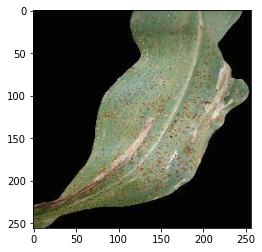

In [31]:
im1 = "../input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG"
dat = tf.keras.utils.load_img(im1)
plt.imshow(dat)
test_dat = tf.keras.preprocessing.image.img_to_array(dat)
test_dat = test_dat/255.0
test_dl = np.expand_dims(test_dat, axis=0)
pred = m1_recontr.predict(test_dl)

print(pred)
y_class = np.argmax(pred,axis=1)

y_class[0]
print(classes[y_class[0]])